## 0. Imports

In [485]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [486]:
df = pd.read_csv("../data/am_pm.csv")

<AxesSubplot:xlabel='am', ylabel='pm'>

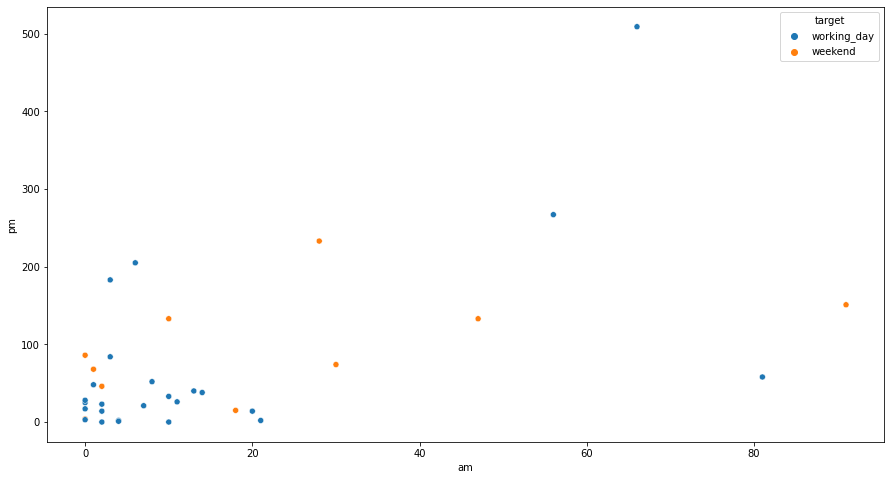

In [487]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="am", y="pm", hue="target")

In [488]:
model = LogisticRegression(random_state=21, fit_intercept=False)
x = df[["am", "pm"]]
y = df["target"]
model.fit(x, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [489]:
w1, w2 = model.coef_[0]
w1, w2


(-0.0003865266152770949, 0.0029806573907424157)

In [490]:
am_vals = np.linspace(df["am"].min(), df["am"].max(), 100)
pm_vals = -(w1 / w2) * am_vals

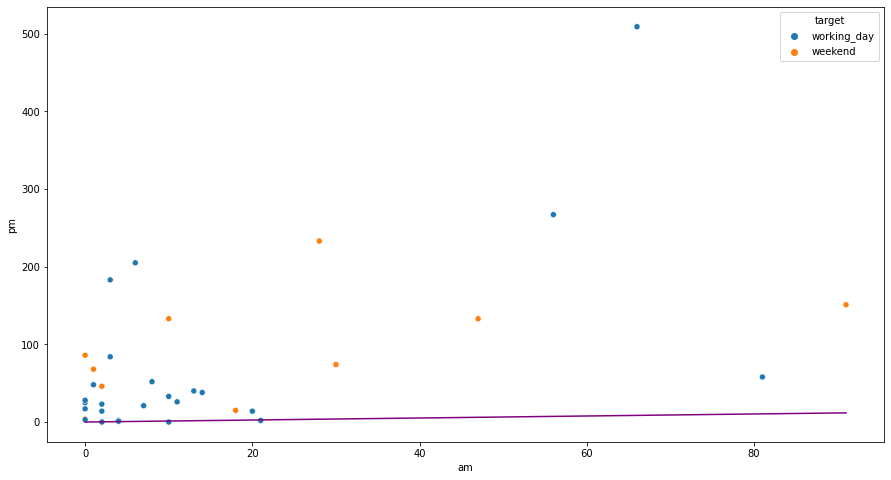

In [491]:
plt.figure(figsize=(15,8))
ax1 = sns.scatterplot(data=df, x="am", y="pm", hue="target")
ax1.plot(am_vals, pm_vals, color="purple")
plt.show()

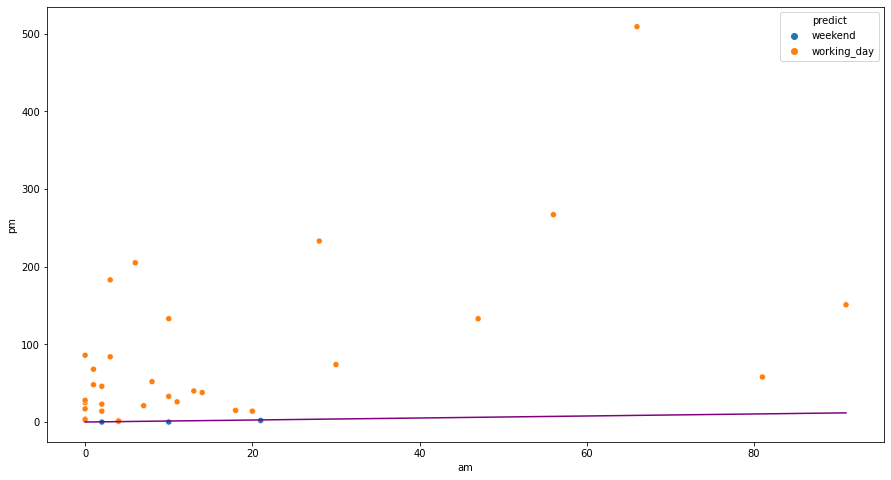

In [492]:
plt.figure(figsize=(15,8))
ax2 = sns.scatterplot(data=df, x="am", y="pm", hue="predict")
ax2.plot(am_vals, pm_vals, color="purple")
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [493]:
df_scaler = df.copy()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scaler[["am", "pm"]] = x_scaled

model_scaled = LogisticRegression(random_state=21, fit_intercept=False)
model_scaled.fit(x_scaled, y)
predict_scaled = model_scaled.predict(x_scaled)
df_scaler["predict"] = predict_scaled
df_scaler

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-23,-0.270442,-0.415502,working_day,working_day
5,2020-04-24,-0.613084,-0.602071,working_day,working_day
6,2020-04-25,0.586162,-0.012906,weekend,weekend
7,2020-04-26,0.500501,1.548382,weekend,weekend
8,2020-04-27,-0.527423,-0.719904,working_day,working_day
9,2020-04-28,-0.527423,-0.729723,working_day,working_day


In [494]:
accuracy_score(y, predict_scaled)

0.7428571428571429

In [495]:
w1_scaled, w2_scaled = model_scaled.coef_[0]
am_vals = np.linspace(df_scaler["am"].min(), df_scaler["am"].max(), 100)
pm_vals = -(w1_scaled / w2_scaled) * am_vals
w1_scaled, w2_scaled

(-0.2539654210052383, -0.07384233039688047)

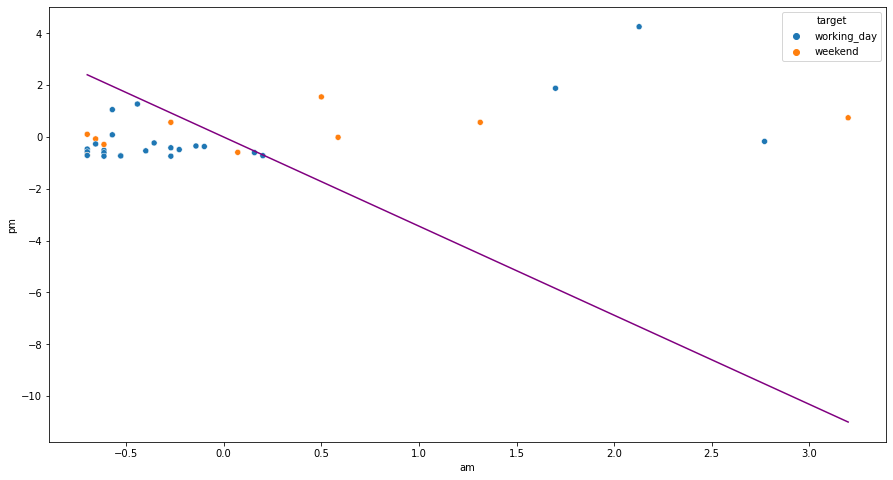

In [496]:
plt.figure(figsize=(15,8))
ax3 = sns.scatterplot(data=df_scaler, x="am", y="pm", hue="target")
ax3.plot(am_vals, pm_vals, color="purple")
plt.show()

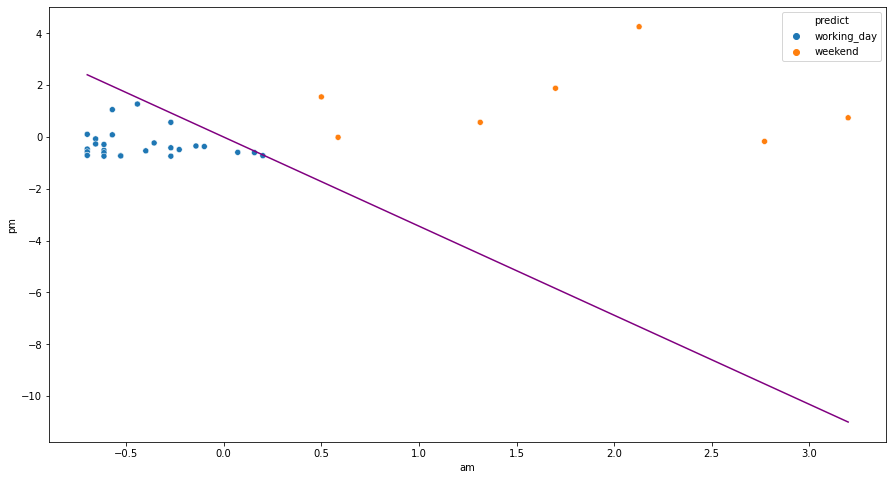

In [497]:
plt.figure(figsize=(15,8))
ax4 = sns.scatterplot(data=df_scaler, x="am", y="pm", hue="predict")
ax4.plot(am_vals, pm_vals, color="purple")
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [498]:
model_svc = SVC(probability=True, random_state=21)
model_svc.fit(x_scaled, y)
predict_svc = model_svc.predict(x_scaled)
df_svc = df_scaler.copy()
df_svc["predict"] = predict_svc
accuracy_score(y, predict_svc)

0.7428571428571429

In [499]:
df_svc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     35 non-null     object 
 1   am       35 non-null     float64
 2   pm       35 non-null     float64
 3   target   35 non-null     object 
 4   predict  35 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.5+ KB


In [500]:
model_svc_linear = SVC(kernel="linear", probability=True, random_state=21)
model_svc_linear.fit(x_scaled, y)
predict_svc_linear = model_svc_linear.predict(x_scaled)
accuracy_score(y, predict_svc_linear)

0.7142857142857143

In [501]:
model_svc_poly = SVC(kernel="poly", probability=True, random_state=21)
model_svc_poly.fit(x_scaled, y)
predict_svc_poly = model_svc_poly.predict(x_scaled)
accuracy_score(y, predict_svc_poly)

0.7428571428571429

In [502]:
model_svc_rbf = SVC(kernel="rbf", probability=True, random_state=21)
model_svc_rbf.fit(x_scaled, y)
predict_svc_rbf = model_svc_rbf.predict(x_scaled)
accuracy_score(y, predict_svc_rbf)

0.7428571428571429

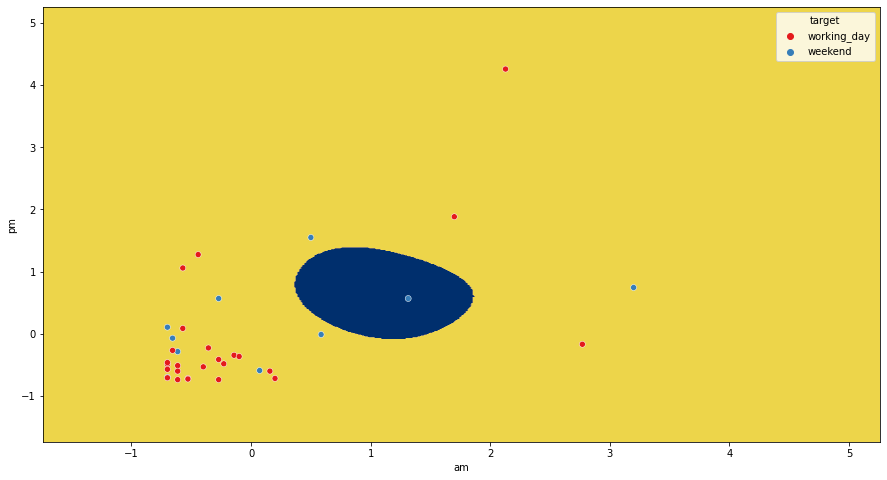

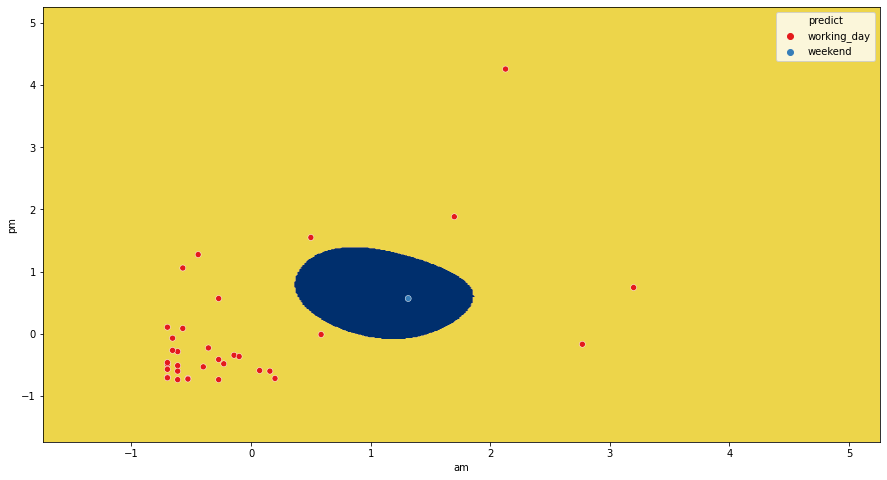

In [503]:
border = np.linspace(x_scaled.min() - 1, x_scaled.max() + 1, 500)
xx, yy = np.meshgrid(border, border)

le = LabelEncoder()
y_num = le.fit_transform(y)
predict_num= le.fit_transform(predict_svc)

grid_predict = model_svc.predict(np.c_[xx.ravel(), yy.ravel()])
grid_predict_num = le.fit_transform(grid_predict)
grid_predict_num = grid_predict_num.reshape(500, 500)

plt.figure(figsize=(15,8))
plt.contourf(xx, yy, grid_predict_num, cmap="cividis")
sns.scatterplot(data=df_svc, x="am", y="pm", hue="target", palette="Set1")
plt.show()

plt.figure(figsize=(15,8))
plt.contourf(xx, yy, grid_predict_num, cmap="cividis")
sns.scatterplot(data=df_svc, x="am", y="pm", hue="predict", palette="Set1")
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [504]:
df_tree = df_scaler.copy()
model_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
model_tree.fit(x_scaled, y)
predict_tree = model_tree.predict(x_scaled)
df_tree["predict"] = predict_tree
accuracy_score(y, predict_tree)

0.9428571428571428

In [505]:
model_tree_n = DecisionTreeClassifier(max_depth=1, random_state=42)
model_tree_n.fit(x_scaled, y)
predict_tree_n = model_tree_n.predict(x_scaled)
accuracy_score(y, predict_tree_n)

0.7714285714285715

In [506]:
model_tree_n = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree_n.fit(x_scaled, y)
predict_tree_n = model_tree_n.predict(x_scaled)
accuracy_score(y, predict_tree_n)

0.9714285714285714

In [507]:
model_tree_n = DecisionTreeClassifier(max_depth=10, random_state=42)
model_tree_n.fit(x_scaled, y)
predict_tree_n = model_tree_n.predict(x_scaled)
accuracy_score(y, predict_tree_n)

1.0

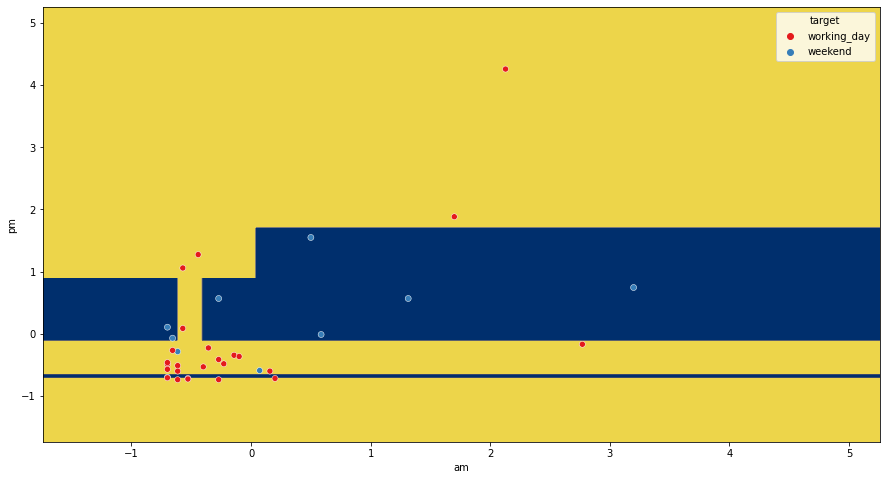

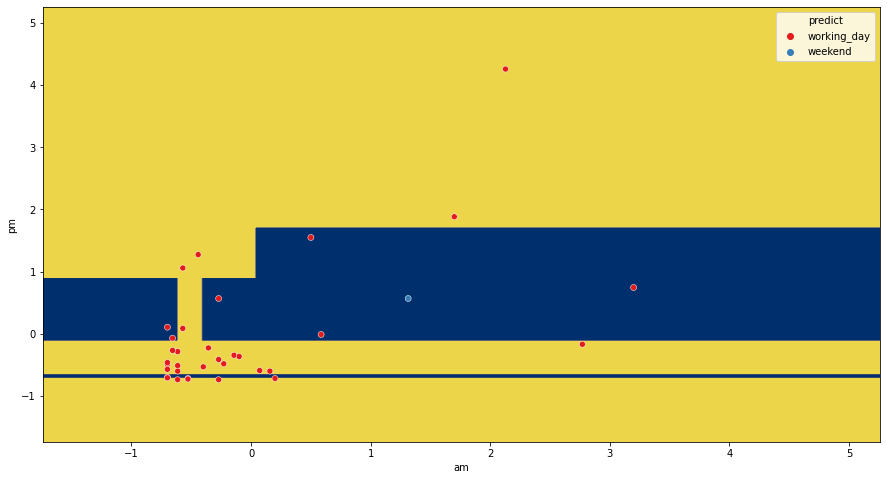

In [508]:
grid_predict = model_tree.predict(np.c_[xx.ravel(), yy.ravel()])
grid_predict_num = le.fit_transform(grid_predict)
grid_predict_num = grid_predict_num.reshape(500, 500)

plt.figure(figsize=(15,8))
plt.contourf(xx, yy, grid_predict_num, cmap="cividis")
sns.scatterplot(data=df_svc, x="am", y="pm", hue="target", palette="Set1")
plt.show()

plt.figure(figsize=(15,8))
plt.contourf(xx, yy, grid_predict_num, cmap="cividis")
sns.scatterplot(data=df_svc, x="am", y="pm", hue="predict", palette="Set1")
plt.show()

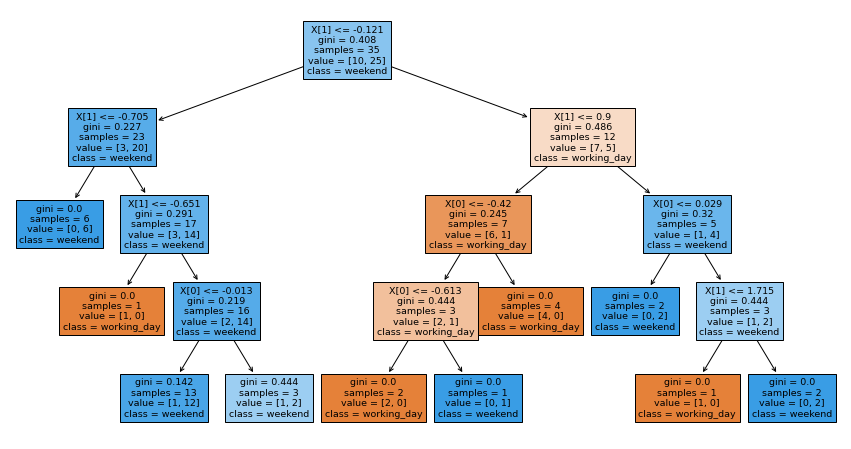

In [509]:
plt.figure(figsize=(15, 8))
plot_tree(model_tree, class_names=["working_day", "weekend"], filled=True)
plt.show()

The answer: 4